In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Checking nulls

In [21]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

conclusion:: no null values present so good to proceed

## Checking relationship between features and labels

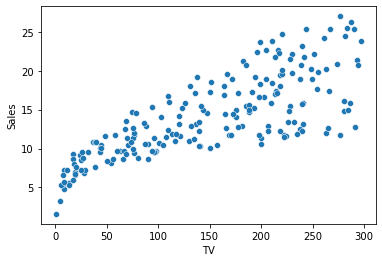

In [22]:
# for TV
sns.scatterplot(x=df['TV'],y=df['sales'],data=df)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

conclusion:: TV sales is linearly ralated to sales as TV sales increases total sales aslo increase.

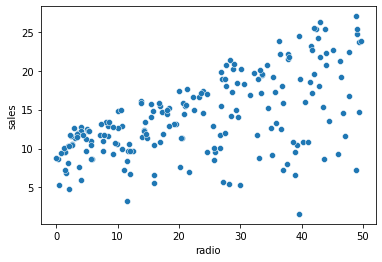

In [23]:
# for radio
sns.scatterplot(x=df['radio'],y=df['sales'],data=df)
plt.xlabel("radio")
plt.ylabel("sales")
plt.show()

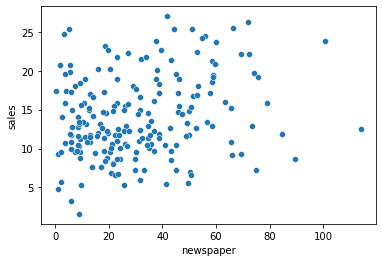

In [24]:
# for newspaper
sns.scatterplot(x=df['newspaper'],y=df['sales'],data=df)
plt.xlabel("newspaper")
plt.ylabel("sales")
plt.show()

conclusion:: We could hardly observe any relation between newspaper and sales

## Checking the correlation 

In [25]:
df.corr().abs()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,0.110680,0.154944,0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,0.154944,0.056648,0.354104,1.000000,0.228299
sales,0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

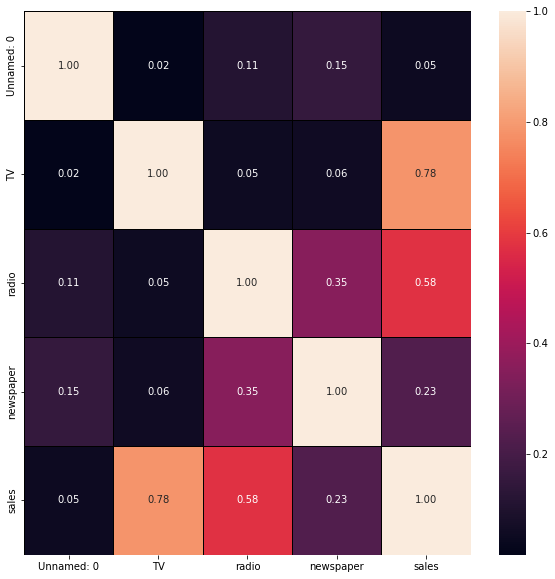

In [26]:
# Plotting correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

conclusion:: No multicollinearity and we could see strong relation between TV and sales.

# Describing data

In [27]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Checking outliers

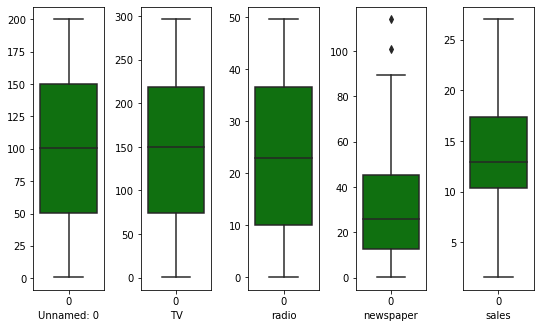

In [28]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i])
    plt.tight_layout()

conclusion:: data is very clean we could see outliers only in newspaper column

## Checking skewness

In [29]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

conclusion:: Considering range of skewness as(-0.5,0.5), ther is skewness in only newspaper column.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

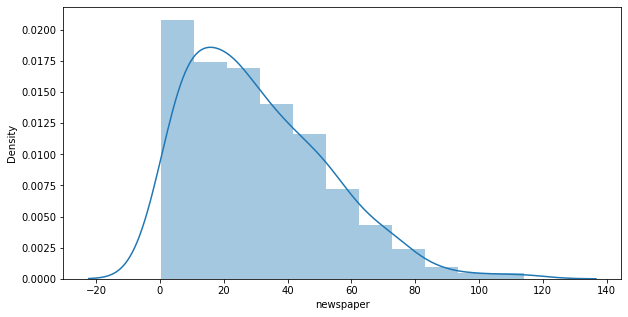

In [30]:
# Plotting dist plot for newspaper column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
sns.distplot(df['newspaper'])

conclusion:: it is skewed towards right side.

## Removing outliers

In [31]:
#Getting sure of outliers using z score

df_z=df.drop(['sales'],axis=1)
z=np.abs(zscore(df_z))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {16, 101}


Number of rows to be eliminated-
 2


In [32]:
df.shape

(200, 5)

In [33]:
#calculating data loss
loss=((200-2)/200)*100
print("The data loss-",100-loss,"%")

The data loss- 1.0 %


conclusion:: data loss is bearable so we can remove outliers

In [35]:
#removing outlier rows
df_new=df.drop(df.index[i[0]])
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Removing skewness

In [36]:
x=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [37]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

## Standardization od data

In [38]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

## Train test split

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 55

Train Accuracy-  90.4

Test Accuracy-  90.4


At random state: 79

Train Accuracy-  90.3

Test Accuracy-  90.3


At random state: 119

Train Accuracy-  90.3

Test Accuracy-  90.3


At random state: 159

Train Accuracy-  90.4

Test Accuracy-  90.4


At random state: 235

Train Accuracy-  90.4

Test Accuracy-  90.4


At random state: 398

Train Accuracy-  90.3

Test Accuracy-  90.3


At random state: 429

Train Accuracy-  90.2

Test Accuracy-  90.2


At random state: 492

Train Accuracy-  90.3

Test Accuracy-  90.3


 Best accuracy at random state- 55


## Linerar regression model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(r2_score(y_train,pred_train)*100,1)
test_accuracy=round(r2_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 90.4

test accuracy- 90.4


## Cross Validation score

In [41]:
for i in range(4,30):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 89.2638334216762

 Accuracy score is- 90.4


At cv- 5

 cross validation score is- 89.34477544725891

 Accuracy score is- 90.4


At cv- 6

 cross validation score is- 89.58573772376907

 Accuracy score is- 90.4


At cv- 7

 cross validation score is- 89.12474492966211

 Accuracy score is- 90.4


At cv- 8

 cross validation score is- 89.56422782886658

 Accuracy score is- 90.4


At cv- 9

 cross validation score is- 89.16056030041695

 Accuracy score is- 90.4


At cv- 10

 cross validation score is- 89.3381888617894

 Accuracy score is- 90.4


At cv- 11

 cross validation score is- 88.65730016501287

 Accuracy score is- 90.4


At cv- 12

 cross validation score is- 89.07881861462478

 Accuracy score is- 90.4


At cv- 13

 cross validation score is- 89.27983520338881

 Accuracy score is- 90.4


At cv- 14

 cross validation score is- 88.28110632672288

 Accuracy score is- 90.4


At cv- 15

 cross validation score is- 88.95631186438773

 Accuracy sco

Best cross validation score is at cv=8.

In [42]:
cv_score_best=cross_val_score(lr,x,y,cv=8).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 89.56422782886658
accuracy score for linear regression model is- 90.4


## Calculating RMSE and MAE

In [44]:
print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(mean_absolute_error(y_test, pred_test))

1.7375519305623683
1.415753848787269


Both the errors are less so model seems working fine.

## Support Vector Regression

In [45]:
from sklearn import svm

In [46]:
sm=svm.SVR()

In [47]:
sm.fit(x_train,y_train)

SVR()

In [48]:
sm_pred_train=sm.predict(x_train)
sm_pred_test=sm.predict(x_test)

In [49]:
sm_acc_train=r2_score(y_train,sm_pred_train)
sm_acc_test=r2_score(y_test,sm_pred_test)
print("acc train",sm_acc_train*100)
print("acc test",sm_acc_test*100)

acc train 89.83681067309344
acc test 83.19968817224905


## Cross Validation Score

In [50]:
for i in range(4,15):
    cv_score=cross_val_score(sm,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",sm_acc_test*100)



At cv- 4

 cross validation score is- 80.46389867854398

 Accuracy score is- 83.19968817224905


At cv- 5

 cross validation score is- 82.70388350738415

 Accuracy score is- 83.19968817224905


At cv- 6

 cross validation score is- 83.57298063796276

 Accuracy score is- 83.19968817224905


At cv- 7

 cross validation score is- 84.70237188024208

 Accuracy score is- 83.19968817224905


At cv- 8

 cross validation score is- 85.29681577773435

 Accuracy score is- 83.19968817224905


At cv- 9

 cross validation score is- 85.45768102294576

 Accuracy score is- 83.19968817224905


At cv- 10

 cross validation score is- 86.85735894024597

 Accuracy score is- 83.19968817224905


At cv- 11

 cross validation score is- 87.16868062262168

 Accuracy score is- 83.19968817224905


At cv- 12

 cross validation score is- 87.06382301937708

 Accuracy score is- 83.19968817224905


At cv- 13

 cross validation score is- 86.90021683126164

 Accuracy score is- 83.19968817224905


At cv- 14

 cross valida

Best cross validation score is at cv=6.

In [51]:
cv_score_best=cross_val_score(sm,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for support vector regressor model is-",sm_acc_test*100)

cross validation score is- 83.57298063796276
accuracy score for support vector regressor model is- 83.19968817224905


## Calculating RMSE and MAE

In [57]:
print(np.sqrt(mean_squared_error(y_test, sm_pred_test)))
print(mean_absolute_error(y_test, sm_pred_test))

2.3043043103379097
1.3770662157063671


RMSE error is higher then MAE, so model is not accurate enough.

## Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf=RandomForestRegressor()

In [60]:
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  99.6

Test Accuracy-  97.4


At random state: 1

Train Accuracy-  99.7

Test Accuracy-  98.3


At random state: 2

Train Accuracy-  99.7

Test Accuracy-  96.4


At random state: 3

Train Accuracy-  99.6

Test Accuracy-  97.4


At random state: 4

Train Accuracy-  99.6

Test Accuracy-  96.6


At random state: 5

Train Accuracy-  99.6

Test Accuracy-  97.9


At random state: 6

Train Accuracy-  99.7

Test Accuracy-  96.5


At random state: 7

Train Accuracy-  99.6

Test Accuracy-  98.1


At random state: 8

Train Accuracy-  99.6

Test Accuracy-  96.8


At random state: 9

Train Accuracy-  99.6

Test Accuracy-  98.5


At random state: 10

Train Accuracy-  99.7

Test Accuracy-  97.4


At random state: 11

Train Accuracy-  99.7

Test Accuracy-  98.5


At random state: 12

Train Accuracy-  99.6

Test Accuracy-  97.7


At random state: 13

Train Accuracy-  99.7

Test Accuracy-  96.1


At random state: 14

Train Accuracy-  99.5

Test Accuracy-  98.2


At 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=17,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_acc_train=round(r2_score(y_train,pred_train)*100,1)
rf_acc_test=round(r2_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",rf_acc_train)
print("\ntest accuracy-",rf_acc_test)


train accuracy- 99.6

test accuracy- 98.2


## Cross validation score

In [62]:
for i in range(4,15):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_acc_test)



At cv- 4

 cross validation score is- 97.5258411050681

 Accuracy score is- 98.2


At cv- 5

 cross validation score is- 97.30210235007094

 Accuracy score is- 98.2


At cv- 6

 cross validation score is- 97.30757020945201

 Accuracy score is- 98.2


At cv- 7

 cross validation score is- 97.32855896269093

 Accuracy score is- 98.2


At cv- 8

 cross validation score is- 97.43880355339596

 Accuracy score is- 98.2


At cv- 9

 cross validation score is- 97.53760665161899

 Accuracy score is- 98.2


At cv- 10

 cross validation score is- 97.54433632520652

 Accuracy score is- 98.2


At cv- 11

 cross validation score is- 97.48972783734764

 Accuracy score is- 98.2


At cv- 12

 cross validation score is- 97.49579686966166

 Accuracy score is- 98.2


At cv- 13

 cross validation score is- 97.55146424233426

 Accuracy score is- 98.2


At cv- 14

 cross validation score is- 97.30720603085834

 Accuracy score is- 98.2


Best cross validation score is at cv=13.

In [63]:
cv_score_best=cross_val_score(rf,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for random forest regressor model is-",rf_acc_test)

cross validation score is- 97.54726434509084
accuracy score for random forest regressor model is- 98.2


## Calculating RMSE and MAE

In [64]:
print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(mean_absolute_error(y_test, pred_test))

0.7306540734164141
0.586825


## Both the errors are near to 0 so Random Forest Regressor is the best performing model with least error and with test accuracy 98.2%.

## So we will go ahead with it and perform hyper parameter tuning on it.

## Hyper Parameter Tuning on Random Forest Regressor

In [65]:
grid_param={'n_estimators':[90,100,115],
            'criterion':['mae','mse']
           
           }

In [66]:
gs=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [67]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [68]:
gs.best_params_

{'criterion': 'mse', 'n_estimators': 90}

In [69]:
rf=RandomForestRegressor(criterion='mse',n_estimators=90)

In [70]:
rf.fit(x_train,y_train)
    

RandomForestRegressor(n_estimators=90)

In [71]:
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_acc_train=round(r2_score(y_train,pred_train)*100,1)
rf_acc_test=round(r2_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",rf_acc_train)
print("\ntest accuracy-",rf_acc_test)


train accuracy- 99.6

test accuracy- 98.4


## Slight change in accuracy even after hyper parameter tuning.

## So we will save random forest regressor model which is giving accuracy 98.4%.

In [72]:
comparision = pd.DataFrame()
comparision['Actual']=y_test
comparision['Predicted']=pred_test
comparision

,Actual,Predicted
0,22.1,21.344444
147,25.4,24.194444
124,19.7,20.155556
177,11.7,12.372222
189,6.7,6.840000
83,13.6,13.152222
76,6.9,7.638889
86,12.0,11.920000
81,12.3,12.185556
158,7.3,6.544444


## Model Saving

In [73]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(sm, open(filename, 'wb'))